# 1 - Import libraries

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 5.8/332.0 MB 35.0 MB/s eta 0:00:10
   - -------------------------------------- 12.8/332.0 MB 34.6 MB/s eta 0:00:10
   -- ------------------------------------- 21.2/332.0 MB 36.3 MB/s eta 0:00:09
   --- ------------------------------------ 26.5/332.0 MB 34.1 MB/s eta 0:00:09
   --- ------------------------------------ 32.2/332.0 MB 32.7 MB/s eta 0:00:10
   ---- ----------------------------------- 37.7/332.0 MB 31.8 MB/s eta 0:00:10
   ----- ---------------------------------- 43.5/332.0 MB 31.3 MB/s eta 0:00:10
   ----- ---------------------------------- 48.8/332.0 MB 30.5 MB/s eta 0:00:10
   ------ --------------------------------- 54.3/332.0 MB 30.2 MB/s eta 0:00:10
   ------- -------------------------------- 60.3/332.0 MB 30.1 MB/s eta 0:00:10
   -------- ------------------------------- 66.6/332.0 MB 30.0 MB/s eta 0:00:09
   -------- ------------------------------- 71.6/3

In [1]:
# ============================================
# SECTION 1: IMPORT LIBRARIES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Traditional ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
tf.random.set_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")


# ============================================
# SECTION 2: LOAD DATA
# ============================================

print("\n" + "="*80)
print("📂 LOADING CLEANED DATA")
print("="*80)

# Load cleaned dataset
df = pd.read_csv('02_cleaned_data.csv')

print(f"✅ Data loaded: {df.shape[0]:,} samples, {df.shape[1]} features")

# Get feature columns
final_features = [col for col in df.columns if col not in ['is_attack', 'label2']]

print(f"✅ Features: {len(final_features)}")

✅ Libraries imported successfully!
✅ TensorFlow version: 2.20.0
✅ GPU available: False

📂 LOADING CLEANED DATA
✅ Data loaded: 685,671 samples, 42 features
✅ Features: 40


# prepare data

In [2]:
print("\n" + "="*80)
print("🎯 PREPARING DATA - MULTI-CLASS CLASSIFICATION")
print("="*80)

# Target: label2 (attack types)
y = df['label2']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"✅ Classes: {len(le.classes_)}")
print(f"✅ Class names: {le.classes_.tolist()}")

# Show distribution
print("\n📊 Class Distribution:")
for i, label in enumerate(le.classes_):
    count = sum(y_encoded == i)
    print(f"  {i}: {label:15s} → {count:6,} samples")

# Prepare features
X = df[final_features].values

print(f"\n✅ X shape: {X.shape}")
print(f"✅ y shape: {y_encoded.shape}")


🎯 PREPARING DATA - MULTI-CLASS CLASSIFICATION
✅ Classes: 8
✅ Class names: ['benign', 'bruteforce', 'ddos', 'dos', 'malware', 'mitm', 'recon', 'web']

📊 Class Distribution:
  0: benign          → 400,672 samples
  1: bruteforce      →  6,016 samples
  2: ddos            → 56,692 samples
  3: dos             → 57,736 samples
  4: malware         → 24,177 samples
  5: mitm            → 25,490 samples
  6: recon           → 105,848 samples
  7: web             →  9,040 samples

✅ X shape: (685671, 40)
✅ y shape: (685671,)


# Train / test 

In [3]:
print("\n" + "="*80)
print("📂 TRAIN/TEST SPLIT (80/20)")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"✅ Train: {X_train.shape[0]:,} samples")
print(f"✅ Test:  {X_test.shape[0]:,} samples")


📂 TRAIN/TEST SPLIT (80/20)
✅ Train: 548,536 samples
✅ Test:  137,135 samples


# scaling

In [8]:
print("\n" + "="*80)
print("⚖️ FEATURE SCALING (StandardScaler)")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")

# Convert labels to categorical (one-hot encoding for neural networks)
y_train_cat = to_categorical(y_train, num_classes=len(le.classes_))
y_test_cat = to_categorical(y_test, num_classes=len(le.classes_))

print(f"✅ Labels converted to categorical")
print(f"   y_train_cat shape: {y_train_cat.shape}")


⚖️ FEATURE SCALING (StandardScaler)
✅ Features scaled!
✅ Labels converted to categorical
   y_train_cat shape: (548536, 8)


# neural network 

🧠 DEEP LEARNING MULTI-CLASS CLASSIFICATION (KERAS)

📂 TRAIN/TEST SPLIT (80/20)
✅ Train: 548,536 samples
✅ Test:  137,135 samples

⚖️ FEATURE SCALING (StandardScaler)
✅ Features scaled!
✅ Labels converted to categorical
   y_train_cat shape: (548536, 8)

### 1.1 TRAINING OF MODEL - DEEP NEURAL NETWORK
✅ Deep Neural Network built!
   Architecture: [40] → [256] → [128] → [64] → [32] → [8]
   Total parameters: 55,784
   Activation: ReLU
   Output: Softmax
   Optimizer: Adam
   Loss: Categorical Crossentropy

📊 Model Architecture:


C:\Users\Microsoft\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,784 (217.91 KB)

 Trainable params: 54,888 (214.41 KB)

 Non-trainable params: 896 (3.50 KB)


⏳ Training Deep Neural Network...
   - Epochs: 100 (with early stopping)
   - Batch Size: 256
   - Validation Split: 20%
   - Early Stopping Patience: 15 epochs
   ⚡ Expected training time: 8-15 minutes

Epoch 1/100
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7264 - loss: 0.8116 - val_accuracy: 0.8512 - val_loss: 0.6665 - learning_rate: 0.0010
Epoch 2/100
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8232 - loss: 0.5958 - val_accuracy: 0.8744 - val_loss: 0.5845 - learning_rate: 0.0010
Epoch 3/100
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8539 - loss: 0.5368 - val_accuracy: 0.8896 - val_loss: 0.5407 - learning_rate: 0.0010
Epoch 4/100
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8684 - loss: 0.5101 - val_accuracy: 0.8940 - val_loss: 0.5060 - learning_rate: 0.0010
Epoch 5/100
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8816 - loss: 0.4814 - val_accuracy: 0.8894 - val_loss: 0.5087 - learning_rate: 0.0010
Epoch 6/100
1

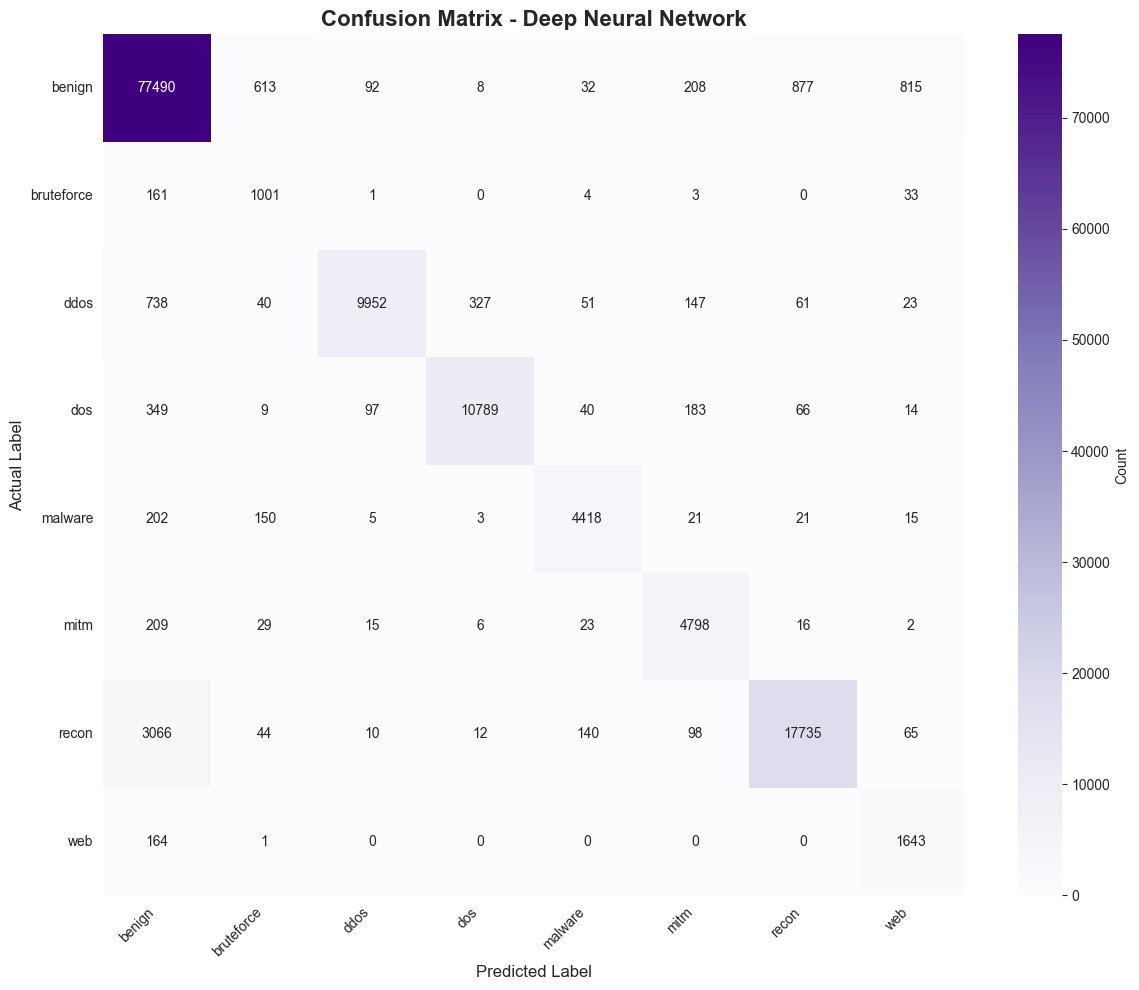

✅ Confusion matrix plotted!

### 1.4 RESULTS BREAKDOWN

📋 Per-Class Performance:
   🟢 benign              : 77,490/80,135 ( 96.7%)
   🔴 bruteforce          : 1,001/1,203 ( 83.2%)
   🟡 ddos                : 9,952/11,339 ( 87.8%)
   🟡 dos                 : 10,789/11,547 ( 93.4%)
   🟡 malware             : 4,418/4,835 ( 91.4%)
   🟡 mitm                : 4,798/5,098 ( 94.1%)
   🔴 recon               : 17,735/21,170 ( 83.8%)
   🟡 web                 : 1,643/1,808 ( 90.9%)

📈 TRAINING HISTORY


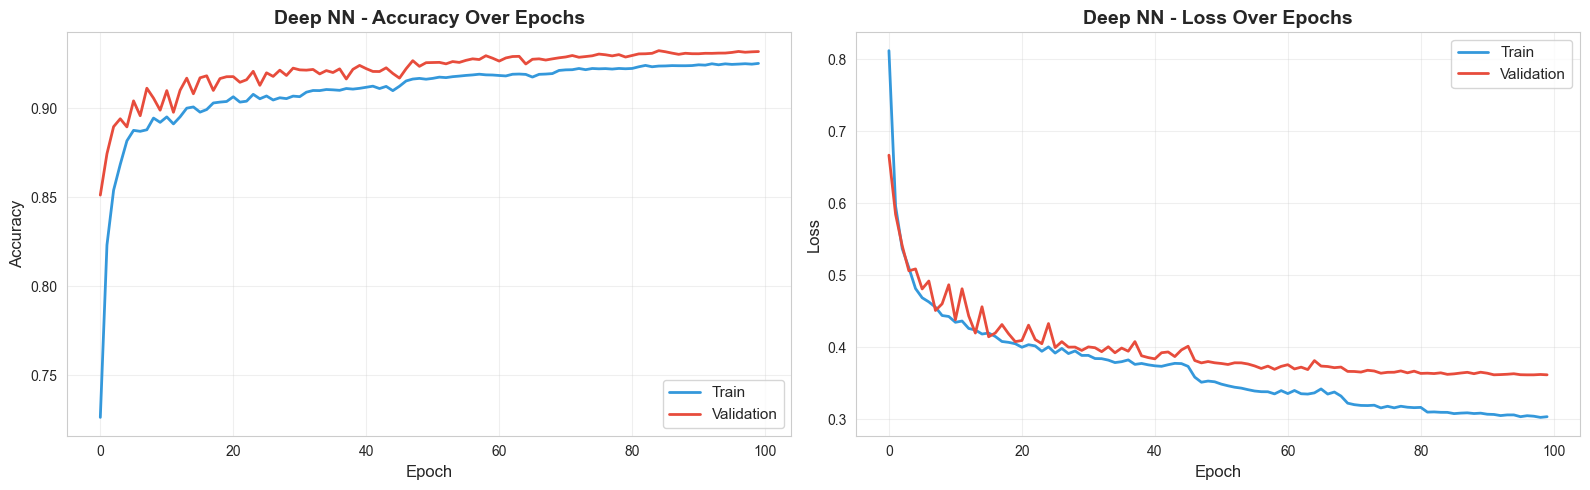

✅ Training history plotted!

🎯 DEEP NEURAL NETWORK SUMMARY
✅ Architecture: 5 hidden layers (256→128→64→32→8)
✅ Total Parameters: 55,784
✅ Training Time: 1647.55s (27.46 min)
✅ Epochs Trained: 100
✅ Final Train Accuracy: 0.9251
✅ Final Val Accuracy: 0.9317
✅ Test Accuracy: 0.9321
✅ Test F1-Score: 0.9328


In [12]:
# ============================================================================
# DEEP LEARNING (NEURAL NETWORK) MULTI-CLASS CLASSIFICATION - KERAS/TENSORFLOW
# ============================================================================
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

print("="*80)
print("🧠 DEEP LEARNING MULTI-CLASS CLASSIFICATION (KERAS)")
print("="*80)

# ============================================================================
# DATA PREPARATION (if not already done)
# ============================================================================

print("\n" + "="*80)
print("📂 TRAIN/TEST SPLIT (80/20)")
print("="*80)

# Note: If you already have X_train, X_test, y_train, y_test, skip this
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,  # Assuming you have X and y_encoded
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"✅ Train: {X_train.shape[0]:,} samples")
print(f"✅ Test:  {X_test.shape[0]:,} samples")

print("\n" + "="*80)
print("⚖️ FEATURE SCALING (StandardScaler)")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled!")

# Convert labels to categorical (one-hot encoding for neural networks)
y_train_cat = to_categorical(y_train, num_classes=len(le.classes_))
y_test_cat = to_categorical(y_test, num_classes=len(le.classes_))
print(f"✅ Labels converted to categorical")
print(f"   y_train_cat shape: {y_train_cat.shape}")

# ============================================================================
# 1.1 TRAINING OF MODEL - DEEP NEURAL NETWORK (5 Layers)
# ============================================================================

print("\n" + "="*80)
print("### 1.1 TRAINING OF MODEL - DEEP NEURAL NETWORK")
print("="*80)

# Build Deep Model
model_deep = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(len(le.classes_), activation='softmax')
], name='Deep_NN')

model_deep.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Deep Neural Network built!")
print(f"   Architecture: [40] → [256] → [128] → [64] → [32] → [8]")
print(f"   Total parameters: {model_deep.count_params():,}")
print(f"   Activation: ReLU")
print(f"   Output: Softmax")
print(f"   Optimizer: Adam")
print(f"   Loss: Categorical Crossentropy")

# Model summary
print("\n📊 Model Architecture:")
model_deep.summary()

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6,
    verbose=1
)

# Train
print("\n" + "="*80)
print("⏳ Training Deep Neural Network...")
print("="*80)
print(f"   - Epochs: 100 (with early stopping)")
print(f"   - Batch Size: 256")
print(f"   - Validation Split: 20%")
print(f"   - Early Stopping Patience: 15 epochs")
print(f"   ⚡ Expected training time: 8-15 minutes")
print("")

start_time = time.time()

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Train with class weights
history_deep = model_deep.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    class_weight=class_weight_dict,  # ← ADD THIS
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time

print(f"\n✅ Training complete!")
print(f"   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
print(f"   Epochs trained: {len(history_deep.history['loss'])}")

# ============================================================================
# 1.2 MAKE PREDICTIONS & OVERALL PERFORMANCES
# ============================================================================

print("\n" + "="*80)
print("### 1.2 MAKE PREDICTIONS & OVERALL PERFORMANCES")
print("="*80)

# Predictions
y_pred_deep_proba = model_deep.predict(X_test_scaled, verbose=0)
y_pred_deep = np.argmax(y_pred_deep_proba, axis=1)

# Metrics
accuracy = accuracy_score(y_test, y_pred_deep)
f1 = f1_score(y_test, y_pred_deep, average='weighted')

print(f"\n🎯 Test Set Performance:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   F1-Score: {f1:.4f}")

# ============================================================================
# 1.3 CONFUSION MATRIX
# ============================================================================

print("\n" + "="*80)
print("### 1.3 CONFUSION MATRIX")
print("="*80)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_deep)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Deep Neural Network', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Confusion matrix plotted!")

# ============================================================================
# 1.4 RESULTS BREAKDOWN
# ============================================================================

print("\n" + "="*80)
print("### 1.4 RESULTS BREAKDOWN")
print("="*80)

# Per-class performance
print("\n📋 Per-Class Performance:")
for i, class_name in enumerate(le.classes_):
    mask = y_test == i
    if sum(mask) > 0:
        correct = sum((y_test == i) & (y_pred_deep == i))
        total = sum(mask)
        acc_class = correct / total
        emoji = "🟢" if acc_class >= 0.95 else "🟡" if acc_class >= 0.85 else "🔴"
        print(f"   {emoji} {class_name:20s}: {correct:5,}/{total:5,} ({acc_class*100:5.1f}%)")

# ============================================================================
# TRAINING HISTORY VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("📈 TRAINING HISTORY")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy plot
axes[0].plot(history_deep.history['accuracy'], label='Train', linewidth=2, color='#3498db')
axes[0].plot(history_deep.history['val_accuracy'], label='Validation', linewidth=2, color='#e74c3c')
axes[0].set_title('Deep NN - Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Loss plot
axes[1].plot(history_deep.history['loss'], label='Train', linewidth=2, color='#3498db')
axes[1].plot(history_deep.history['val_loss'], label='Validation', linewidth=2, color='#e74c3c')
axes[1].set_title('Deep NN - Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Training history plotted!")

# Final summary
print("\n" + "="*80)
print("🎯 DEEP NEURAL NETWORK SUMMARY")
print("="*80)
print(f"✅ Architecture: 5 hidden layers (256→128→64→32→8)")
print(f"✅ Total Parameters: {model_deep.count_params():,}")
print(f"✅ Training Time: {training_time:.2f}s ({training_time/60:.2f} min)")
print(f"✅ Epochs Trained: {len(history_deep.history['loss'])}")
print(f"✅ Final Train Accuracy: {history_deep.history['accuracy'][-1]:.4f}")
print(f"✅ Final Val Accuracy: {history_deep.history['val_accuracy'][-1]:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")
print(f"✅ Test F1-Score: {f1:.4f}")
print("="*80)